## PRiAD Projekt

# Breast Cancer Diagnostic

**Zbór danych**: Breast Cancer Wisconsin (Diagnostic). Predict whether the cancer is benign or malignant

**Zadanie**: Eksploracyjna analiza danych oraz predykcja czy rak jest złośliwy (M) czy łagodny (B)  dla zbioru Breast Cancer Wisconsin

**Skład zespołu**: Martyna Kochalska, Polina Nesterova

**Data wykonania**: DD-MM-RRRR

## 1. Import bibliotek i wczytanie zbioru danych

In [24]:
import kagglehub

# Download latest version
path = "data.csv"

print("Path to dataset files:", path)

Path to dataset files: data.csv


In [25]:
# Importy 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Wczytanie danych z pliku CSV do obiektu DataFrame
data = pd.read_csv(path) # Funkcja ładuje dane z pliku CSV do struktury DataFrame.
data.head # wyświetla pierwsze 5 wierszy, co pomaga szybko podejrzeć strukturę danych.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Wyjaśnienie:
W tej sekcji importujemy niezbędne biblioteki, takie jak `pandas` do przetwarzania danych, `seaborn` i `matplotlib` do wizualizacji, oraz narzędzia ze `sklearn` do przetwarzania danych i ich podziału. 

Dane pochodzą ze zbioru Breast Cancer Wisconsin (Diagnostic), a poniższy kod przedstawia **pierwszych kilka wierszy danych**.

## 2. Analiza rozkładu klas

Rozkład klas (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


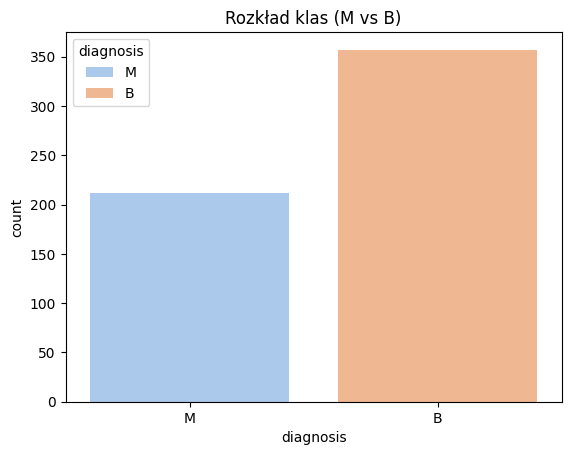

In [26]:
print("Rozkład klas (diagnosis):")
print(data['diagnosis'].value_counts())


# Wizualizacja rozkładu klas przy pomocy wykresu słupkowego
sns.countplot(x='diagnosis', hue='diagnosis', data=data, palette='pastel', legend=True)
plt.title("Rozkład klas (M vs B)")
plt.show()

# Powyższe kroki pozwalają nam sprawdzić, czy dane są zbalansowane między klasą 'M' (złośliwy) i 'B' (łagodny).
# `value_counts()` podaje liczbę wystąpień każdej klasy.
# `sns.countplot` tworzy wykres słupkowy, aby wizualnie ocenić proporcje klas.

### Wyjaśnienie: 
Z powyższego wykresu możemy określić, czy dane są zbalansowane. 
W przypadku klasyfikacji niezbalansowany zbior może wymagać specjalnych metod np. oversampling.

## 4. Konwersja klasy na wartości binarne (M: 1, B: 0)

In [27]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

### Wyjaśnienie: 
Konwersja wartości diagnozy na wartości binarne (M: 1, B: 0) upraszcza interpretację wyników modelu klasyfikacyjnego i umożliwia łatwiejszą implementację algorytmów ML.

## 5. Usunięcie kolumny 'id', ponieważ nie wnosi wartości do analizy

In [28]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

### Wyjaśnienie: 
Kolumna 'id' to tylko identyfikator i nie ma związku z predykcją. 
Usunięcie jej zmniejsza szum w danych.

## 6. Wizualizacja - wykresy pudełkowe dla wybranych cech

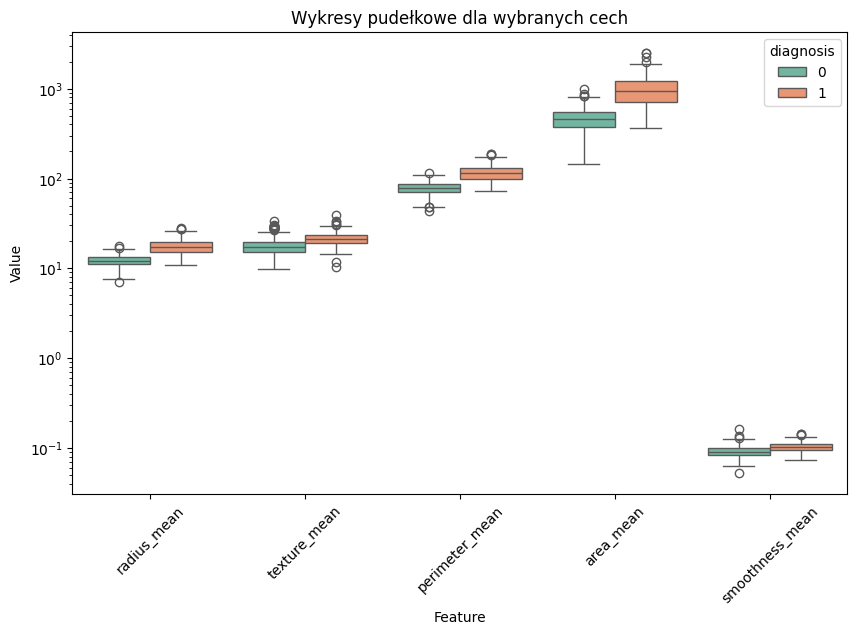

In [29]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Topienie (melt) tabeli danych, aby przekształcić ją w format długi do wygodnego rysowania
data_melted = data.melt(
    id_vars='diagnosis',      # Zmienna, która pozostaje "kluczem"
    value_vars=features,      # Kolumny, które zamieniamy na wiersze
    var_name='Feature',       # Nazwa kolumny, w której znajdzie się nazwa cechy
    value_name='Value'        # Nazwa kolumny z wartościami cechy
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='diagnosis', data=data_melted, palette='Set2')
plt.yscale('log')  # Logarytmiczna skala dla osi Y  # Logarytmiczna skala na osi Y
plt.title("Wykresy pudełkowe dla wybranych cech")
plt.xticks(rotation=45)
plt.show()

### Wyjaśnienie: 
Wykres pudełkowy pozwala wizualizować rozkład wartości danej cechy w zależności od klasy diagnozy (M lub B). 


### Wnioski: 
Wykresy pudełkowe pokazują wyraźne różnice w rozkładzie wartości cech między klasami diagnozy. Cechy takie jak radius_mean i area_mean mogą być kluczowe w odróżnianiu klas, co warto uwzględnić podczas wyboru cech do modelu.

## 7. Wizualizacja - histogramy dla wybranych cech

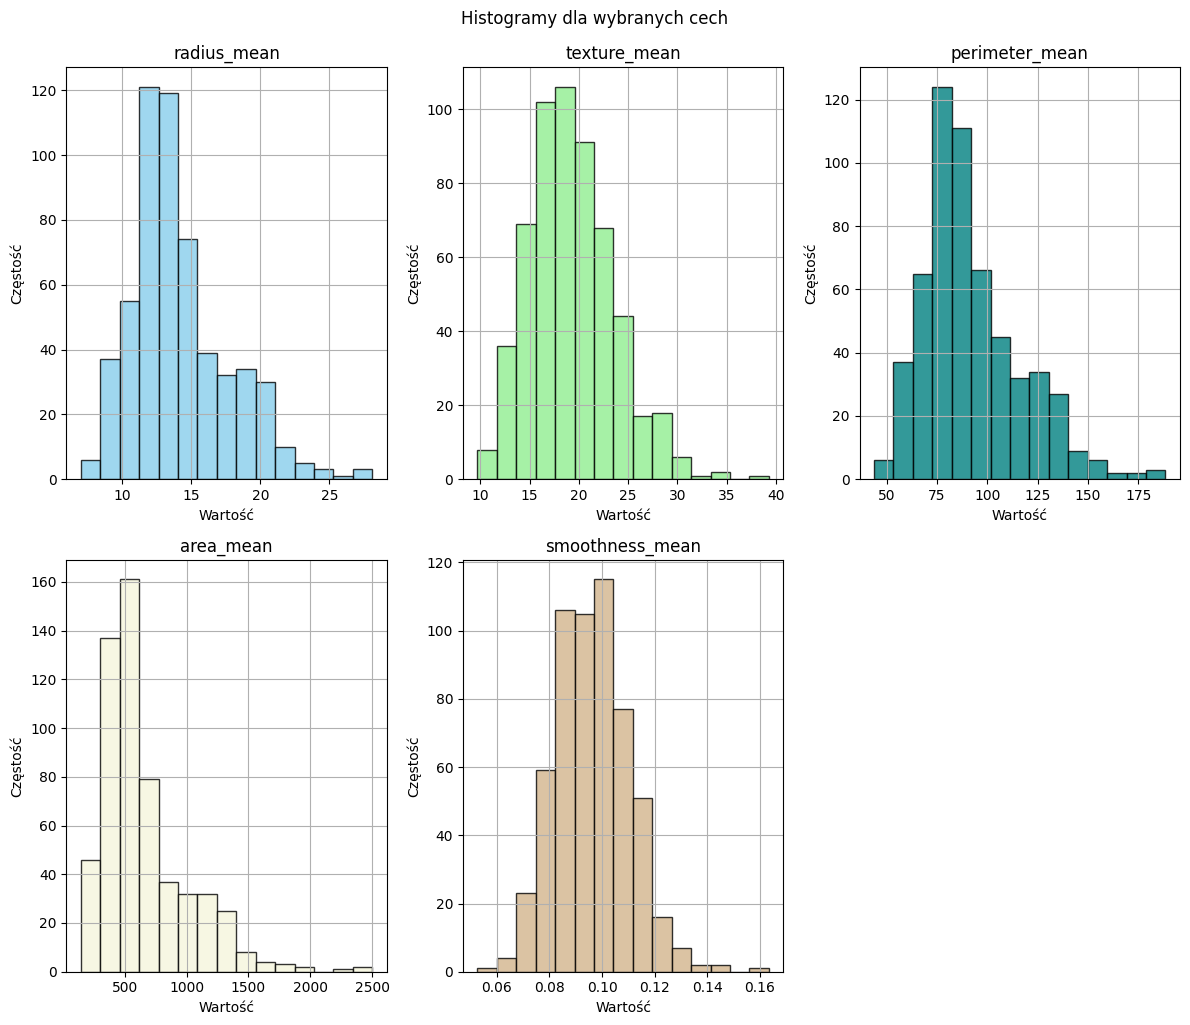

In [30]:
colors = ['skyblue', 'lightgreen', 'teal', 'beige', 'tan']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Układ w siatce 2x3 (dla maksymalnie 6 cech)
    data[feature].hist(bins=15, color=colors[i], edgecolor='black', alpha=0.8)
    plt.title(feature)
    plt.xlabel("Wartość")
    plt.ylabel("Częstość")

plt.tight_layout()  # Automatyczne dopasowanie wykresów
plt.suptitle("Histogramy dla wybranych cech", y=1.02)  # Tytuł globalny
plt.show()


### Wyjaśnienie: 
Histogram pokazuje rozkład liczebności dla każdej cechy i pozwala zidentyfikować, czy istnieje wyraźna separacja między klasami.

### Wnioski: 
Histogramy potwierdzają, że pewne cechy, takie jak radius_mean czy perimeter_mean, mają rozkłady, które mogą ułatwić separację klas. Widoczne różnice w wartościach między klasami wskazują na ich wysoką istotność w klasyfikacji.

In [31]:
## 8. Analiza korelacji

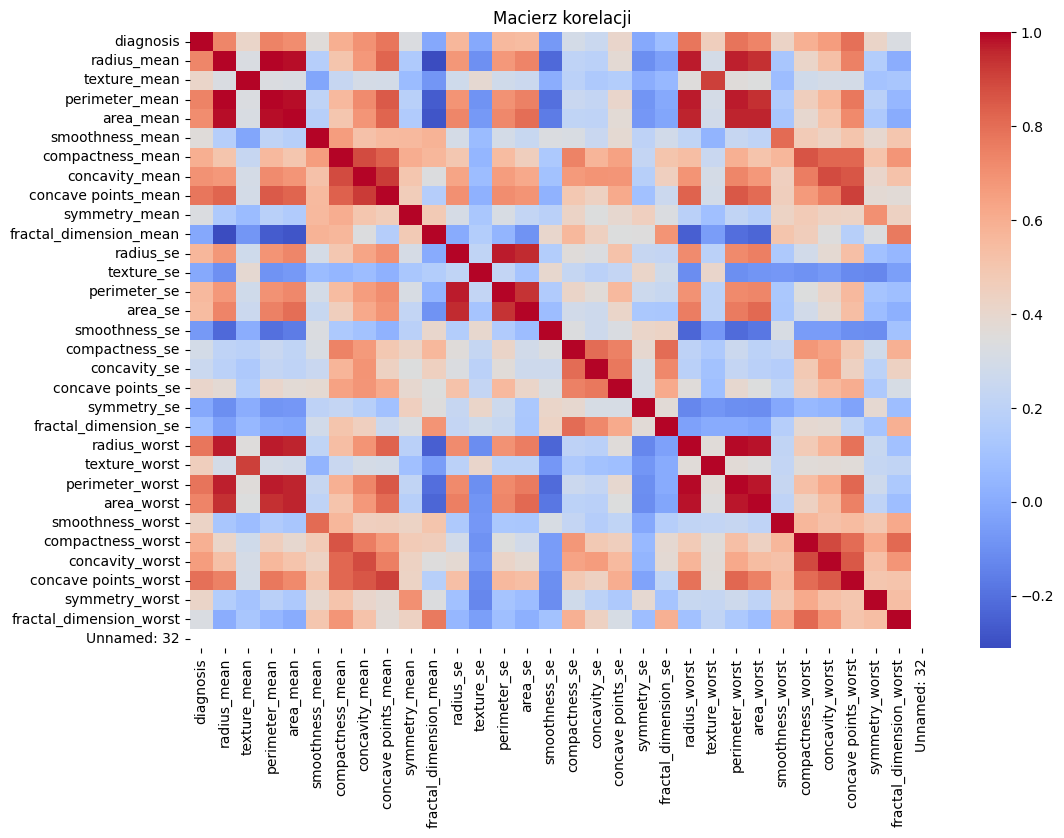

In [32]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Macierz korelacji")
plt.show()

### Wyjaśnienie: 
Macierz korelacji pokazuje siłę związku między zmiennymi. Można na jej podstawie wybrać najbardziej istotne cechy do modelu. Ciemniejsze/pomarańczowe pola oznaczają silniejszą korelację dodatnią, a niebieskie ujemną.

## 9. Identyfikacja najważniejszych cech względem diagnozy

In [33]:
correlation_with_diagnosis = correlation_matrix['diagnosis'].sort_values(ascending=False)
print("Korelacja cech z diagnozą (malejąco):")
print(correlation_with_diagnosis.head(10))

Korelacja cech z diagnozą (malejąco):
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


### Wyjaśnienie: 
Wysoka korelacja wskazuje cechy najbardziej związane z klasyfikacją diagnozy.

### Wnioski: 
Cechy takie jak **concave points_worst, perimeter_worst, itd** mają najwyższą korelację z diagnozą. Powinny one zostać uwzględnione w modelu klasyfikacyjnym, ponieważ mają największy wpływ na wyniki.

## 10. Sprawdzenie brakujących wartości

In [46]:
missing_values = data.isnull().sum()
print(f"Brakujące wartości (suma w całych danych) = {missing_values.sum()}")

Brakujące wartości (suma w całych danych) = 0


### Wyjaśnienie: 
Brak brakujących wartości oznacza, że nie musimy stosować imputacji czy usuwania wierszy.

## 11. Normalizacja/standaryzacja danych

In [35]:
features_to_scale = data.drop('diagnosis', axis=1).columns # features_to_scale to wszystkie kolumny poza 'diagnosis'.

### 11.a. Sprawdzenie cech o zerowej wariancji

In [36]:
zero_var_features = [col for col in features_to_scale if data[col].nunique() <= 1]
if zero_var_features:
    print("Cechy o zerowej wariancji:", zero_var_features)
    data.drop(columns=zero_var_features, inplace=True)
    features_to_scale = data.drop('diagnosis', axis=1).columns

Cechy o zerowej wariancji: ['Unnamed: 32']


### 11.b. Sprawdzenie obecności wartości nieskończonych

In [37]:
infinite_values = data[features_to_scale].isin([np.inf, -np.inf]).sum()
if infinite_values.sum() > 0:
    print("Znaleziono wartości nieskończone w kolumnach:")
    print(infinite_values[infinite_values > 0])
    # Zamiana wartości nieskończonych na NaN
    data[features_to_scale] = data[features_to_scale].replace([np.inf, -np.inf], np.nan)
    # Opcjonalnie: usunięcie wierszy z NaN
    data.dropna(subset=features_to_scale, inplace=True)

### 11.c. Finalne sprawdzenie brakujących wartości po ewentualnych korektach

In [38]:
missing_after = data[features_to_scale].isnull().sum().sum()
if missing_after > 0:
    print(f"Usuwanie wierszy z brakującymi wartościami: {missing_after}")
    data.dropna(subset=features_to_scale, inplace=True)

## 12. Klasyfikacja

W tej części zastosujemu różne modele klasyfikacyjne, takie jak KNN, Naive Bayes oraz Drzewo Decyzyjne, o których uczyliśmy się na zajęciach, oraz dodatkowo zapoznamy się z metodą Random Forest oraz Regresją logistyczną. Uzyskamy ich skuteczność korzystając z danych testowych, a na koniec porównamy wyniki danych modeli.

### 12.a Zaimportujmy najpierw niezbędne biblioteki:

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict 

### Wyjaśnienie
KNeighborsClassifier - gotowa implementacja algorytmu KNN z biblioteki scikit-learn  <br>
GaussianNB - gotowa implementacja algorytmu Naive Bayes z biblioteki scikit-learn  <br>
DecisionTreeClassifier - gotowa implementacja algorytmu Drzewa Decyzyjnego z biblioteki  scikit-learn  <br>
RandomForestClassifier - gotowa implementacja algorytmu Random Forest z biblioteki  scikit-learn  <br>
LogisticRegression - gotowa implementacja algorytmu Regresji Logistycznej z biblioteki  scikit-learn  <br>
accuracy_score, precision_score, recall_score, f1_score - metryki oceny skuteczności klasyfikacji  <br>
defaultdict - słownik, który automatycznie tworzy i zwraca wartość domyślną dla nieistniejących kluczy, zamiast podnosić wyjątek KeyError

### 12.b Wstępna konfiguracja:


In [40]:
n_iterations = 10
metrics = ['accuracy', 'precision', 'recall', 'f1']
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42)
}

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

results = defaultdict(list)

### Wyjaśnienie:
n_iterations to liczba powtórzeń późniejszej pętli skryptu. Pętla ta umożliwi przetesowanie stabilności zależne od różnych podziałów danych. <br>
4 kluczowe metryki - ['accuracy', 'precision', 'recall', 'f1'] będą przydatne do problemów klasyfikacji binarnej <br>
Dodajemy modele do słownika, aby poźniej w skrypcie móc je sprawdzić hurtowo, nie powtarzając kodu. <br>
random_state to parametr kontrolujący losowość procesu, zapewni w modelu drzewiastych reprodukowalność (na nasze potrzeby przydatną, w środowisku produkcyjnym się tego nie używa) <br>
Dane dzielimy na X i Y, czyli kolejno na dane bez kolumny diagnozy, oraz samą diagnozę. 


### 12.c Skrypt testujący modele

Ze względu na długość skryptu użyję komentarzy bezpośrednio w kodzie do opisu zdarzeń

In [41]:
for seed in range(n_iterations):
    # Podział danych z uwzględnieniem stratyfikacji (wyrównania proporcji klas względem orginału) 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.3, 
        random_state=seed, 
        stratify=y
    )
    
    # Skalowanie dla wybranych modeli (KNN, Regresja logistyczna)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Testowanie każdego modelu
    for model_name, model in models.items():
        # Wybór wersji danych (skalowanych/zwykłych)
        if model_name in ['KNN', 'Logistic Regression']:
            train_data = X_train_scaled
            test_data = X_test_scaled
        else:
            train_data = X_train
            test_data = X_test
            
        # Trening i predykcja
        model.fit(train_data, y_train)
        preds = model.predict(test_data)
        
        # Zapis wyników
        results[f'{model_name}_accuracy'].append(accuracy_score(y_test, preds))
        results[f'{model_name}_precision'].append(precision_score(y_test, preds))
        results[f'{model_name}_recall'].append(recall_score(y_test, preds))
        results[f'{model_name}_f1'].append(f1_score(y_test, preds))

print(f"Liczba próbek treningowych: {len(X_train)}")
print(f"Liczba próbek testowych: {len(X_test)}")

Liczba próbek treningowych: 398
Liczba próbek testowych: 171


### Wyjaśnienie: 
Rozdzielenie danych na zbiór treningowy i testowy zapewnia możliwość oceny modelu na niezależnym zbiorze. Rozkład (70% treningowy, 30% testowy) jest standardowy i powinien umożliwić dobrą ocenę wydajności modelu. <br>
Stratyfikacja zachowuje proporcje klas w podziałach danych. Każda iteracja używa innego ziarna losowości (seed) <br>
Standaryzacja danych zapewnia porównywalność cech niezależnie od ich jednostek i zakresów. Niektóre modele działają na danych surowych, co przyspiesza obliczenia  <br>



### 12.d Analiza wyników

In [42]:
# Inicjalizacja pustych struktur danych
results_df = pd.DataFrame(results)
summary = pd.DataFrame()

# Obliczanie średniej i odchylenia standardowego dla każdej metryki i modelu
for model in models.keys():
    for metric in metrics:
        col_name = f'{model}_{metric}'
        summary.loc['mean', col_name] = np.mean(results_df[col_name])
        summary.loc['std', col_name] = np.std(results_df[col_name])

# Przekształcenie danych do formatu long
summary_long = summary.stack().reset_index()
summary_long.columns = ['Stat', 'Metric_Model', 'Value']
summary_long[['Model', 'Metric']] = summary_long['Metric_Model'].str.split('_', expand=True)
summary_pivot = summary_long.pivot_table(index=['Model', 'Metric'], columns='Stat', values='Value')

# Stylowanie z gradientem i zaokrągleniem
styled = (summary_pivot.style
          .background_gradient(subset=['mean'], cmap='Blues')
          .background_gradient(subset=['std'], cmap='Reds')
          .format("{:.3f}"))

display(styled)

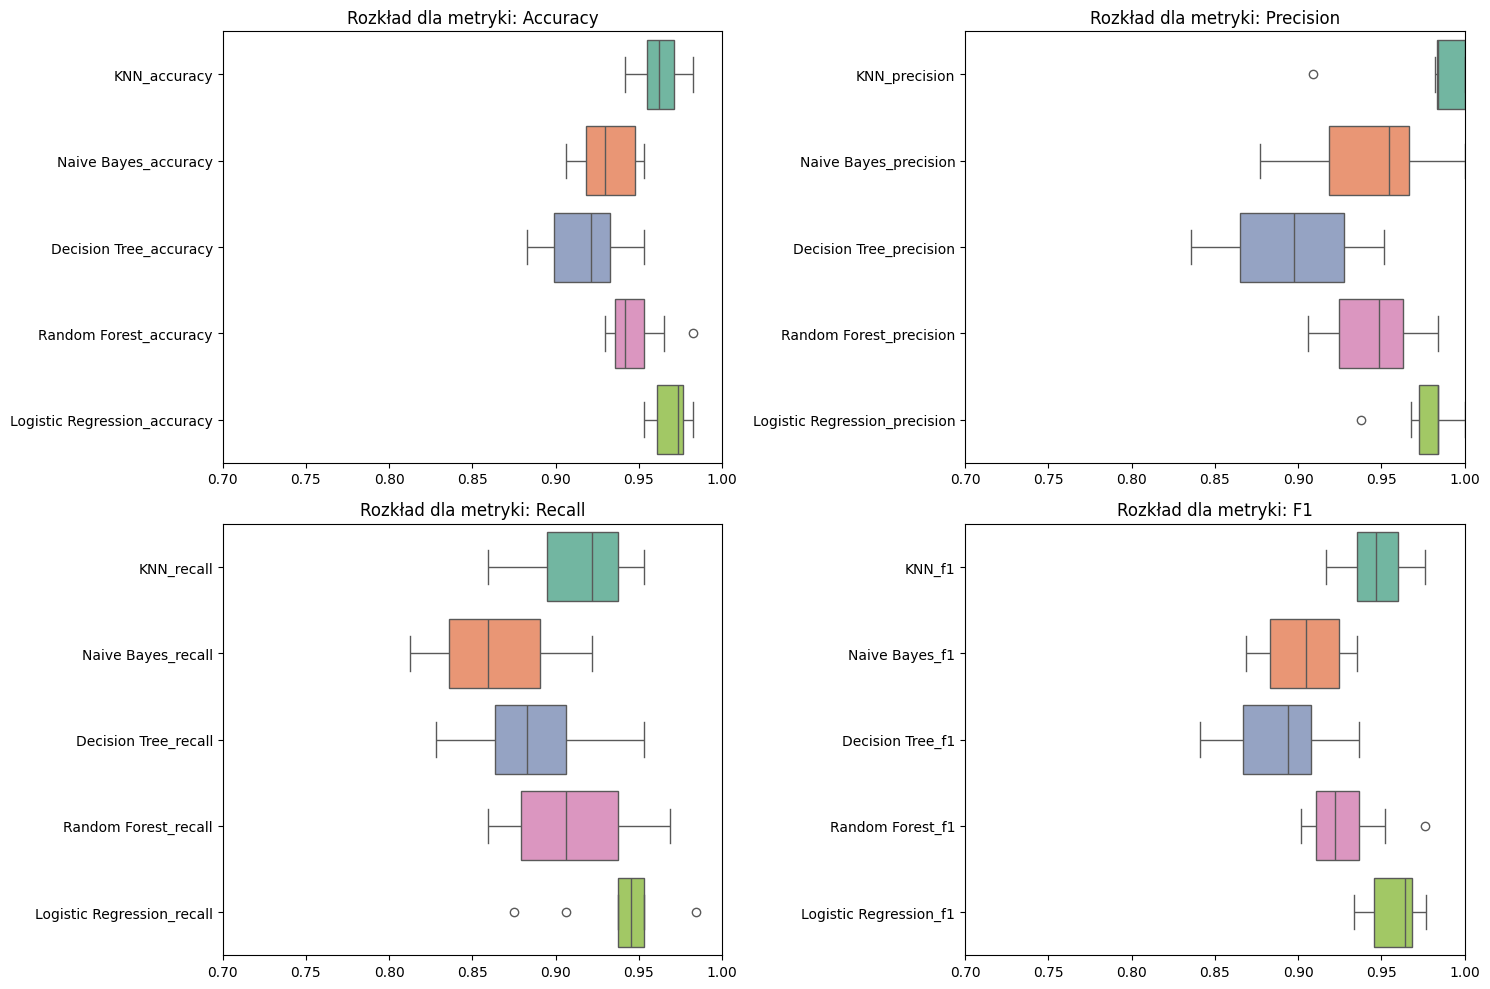

In [43]:
plt.figure(figsize=(15, 10))
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1'], 1):
    plt.subplot(2, 2, i)
    
    # Przygotowanie danych w długim formacie
    plot_data = results_df.melt(value_vars=[c for c in results_df if metric in c])
    
    sns.boxplot(
        data=plot_data,
        x='value',
        y='variable',  # Główna oś Y
        hue='variable',  # Grupowanie dla kolorów
        palette='Set2',
        legend=False
    )
    
    plt.title(f'Rozkład dla metryki: {metric.capitalize()}')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0.7, 1.0)
    
plt.tight_layout()
plt.show()

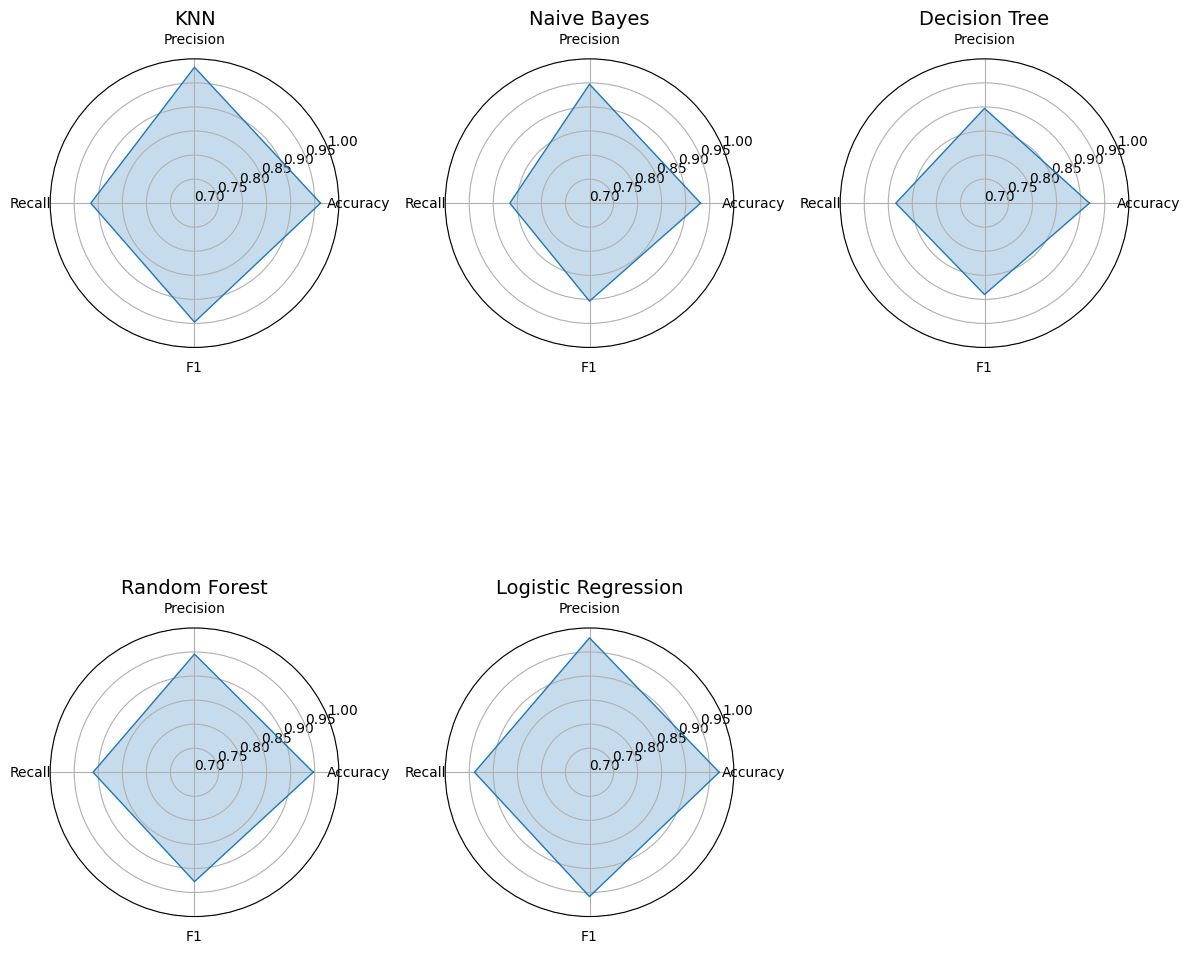

In [44]:
fig = plt.figure(figsize=(12, 12))
categories = ['Accuracy', 'Precision', 'Recall', 'F1']
N = len(categories)

for i, model in enumerate(models.keys()):
    values = [
        summary_pivot.loc[(model, 'accuracy'), 'mean'],
        summary_pivot.loc[(model, 'precision'), 'mean'],
        summary_pivot.loc[(model, 'recall'), 'mean'],
        summary_pivot.loc[(model, 'f1'), 'mean']
    ]
    
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    
    ax = fig.add_subplot((len(models) + 2) // 3, 3, i+1, polar=True) 
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_ylim(0.7, 1.0)
    ax.set_title(model, size=14, position=(0.5, 1.1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

plt.tight_layout()
plt.show()

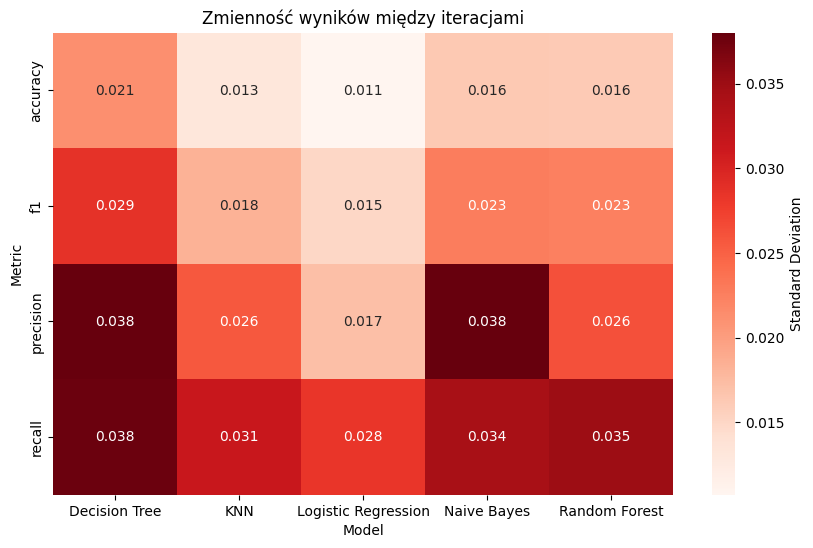

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    summary_pivot['std'].unstack().T,
    annot=True, fmt=".3f",
    cmap="Reds", cbar_kws={'label': 'Standard Deviation'}
)
plt.title("Zmienność wyników między iteracjami")
plt.show()

## 13.e Wnioski:
